# DATA ANALYTICS FINAL PROJECT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('C:\\Users\\HP\\Desktop\\SpotifyFeatures.csv')
data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


First of all we try to define the problem statement related to this dataset. Since the initial phase of every data science project involves the recognition of a quantifiable mathematical problem, therefore we need to figure out what kind of solution might be required in order to make use of this specific dataset.

We here see that the data consisting several columns columns of the specifications in a world renowned music app called 'Spotify'. In this project we will try to figure out what makes the valence (which is said to be a quantified measure of the of postiveness in a specific song for this app and has a value ranging from -1 to +1. The song containing a negative value describes a song being negative and +1 values indicates that the song has a posiive value to the people) so significant to be quantified so accurately. Therefore our problem would mainly revolve around the same idea that what makes a song positive or negative.

Also, we will try answering the questions like :

1. Which attribute has the highest contribution towards determining the valence of the song?

2. Which kind of genre is most preferred out of the given dataset?

3. Who has the highest popularity in terms of the scale given in the dataset?

4. Preference of the artists (plots between the popularity and artist name)

5. Is there any pattern in the popular songs that is there in the charting?

One of the very important attribute of the dataset which needs to be described is the 'Time_signature' which is said to be an estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of “3/4”, to “7/4”.

The other important attribute that needs of be discussed here is the 'liveness'. This value describes the probability that the song was recorded with a live audience. According to the official documentation 'a value above 0.8 provides strong likelihood that the track is live'.

Other than these attributes, all other information regarding the various variables are present in the link https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/ .

Therefore we can try out different methods in order to establish this problem statement. Various steps like Data cleaning, Exploratory data analysis (EDA), model building, model evaluation has to be carried out and are as follows :- 

# EDA and Data Cleaning

In [3]:
#establishing whether the given data has any missing values in it or not.
data.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

Therefore we here see that there is no missing data in the columns. All the columns can hence be taken for the analysis.

In [4]:
#checking unique values in the columns
data.nunique()

genre                   27
artist_name          14564
track_name          148615
track_id            176774
popularity             101
acousticness          4734
danceability          1295
duration_ms          70749
energy                2517
instrumentalness      5400
key                     12
liveness              1732
loudness             27923
mode                     2
speechiness           1641
tempo                78512
time_signature           5
valence               1692
dtype: int64

In [5]:
#checking duplicate values in the columns
data.duplicated()

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
232695    False
232696    False
232697    False
232698    False
232699    False
232700    False
232701    False
232702    False
232703    False
232704    False
232705    False
232706    False
232707    False
232708    False
232709    False
232710    False
232711    False
232712    False
232713    False
232714    False
232715    False
232716    False
232717    False
232718    False
232719    False
232720    False
232721    False
232722    False
232723    False
232724    False
Length: 232725, dtype: b

In [6]:
#describing the mathematical tendencies of the data
data.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [7]:
#dropping the unneccessary columns from the given data
data.drop(['track_id','key'],axis=1, inplace=True)

In [8]:
data.head()

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0,0.611,0.389,99373,0.910,0.000,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),1,0.246,0.590,137373,0.737,0.000,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,3,0.952,0.663,170267,0.131,0.000,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0,0.703,0.240,152427,0.326,0.000,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,4,0.950,0.331,82625,0.225,0.123,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


Since track_id is something that cannot be logically related to the variable with whom we are trying to establish the relationship, therefore I preferred dropping the column altogether. Same is the reason behind droping the key column.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000005C4282160>,
      dtype=object)

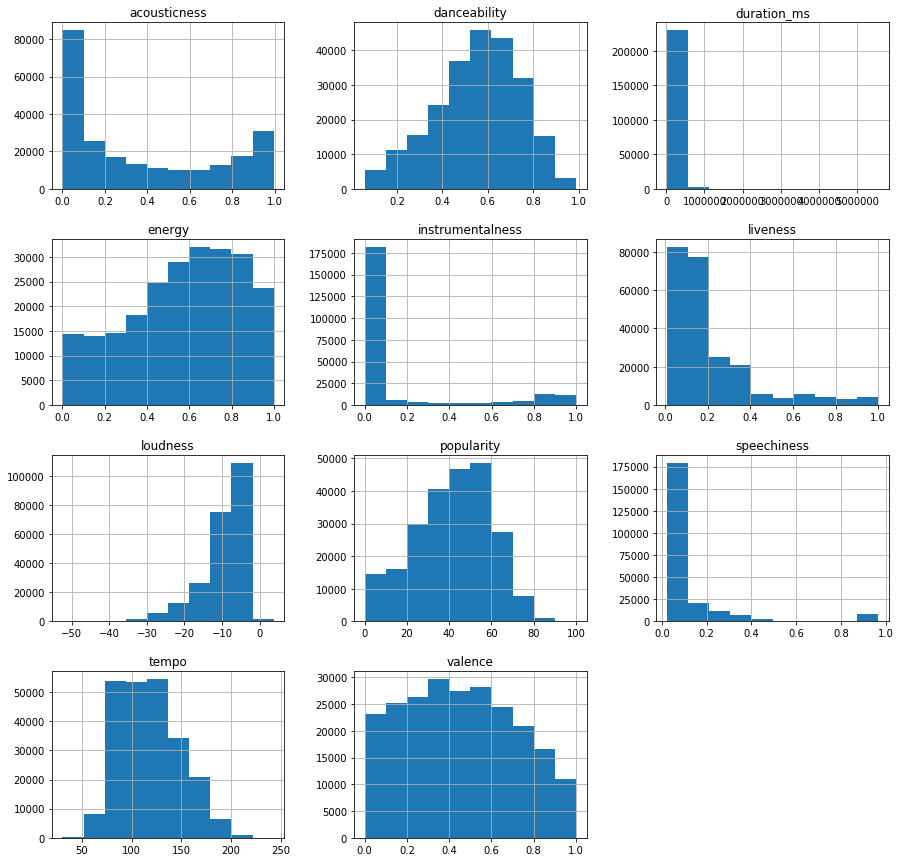

In [9]:
data.hist(figsize = (15,15))

Analysis of the histograms - 

1. Most of the columns in the data are skewed and not normally distributed.

2. Histograms can also depict the presence of outliers in a brief, as we can see in the speechiness column, most of the values are in the left hand side of the bins. But there is also a slight range of values in the extreme right bin. This can give us an idea that the column speechiness has a possibility to have outliers in the dataset.

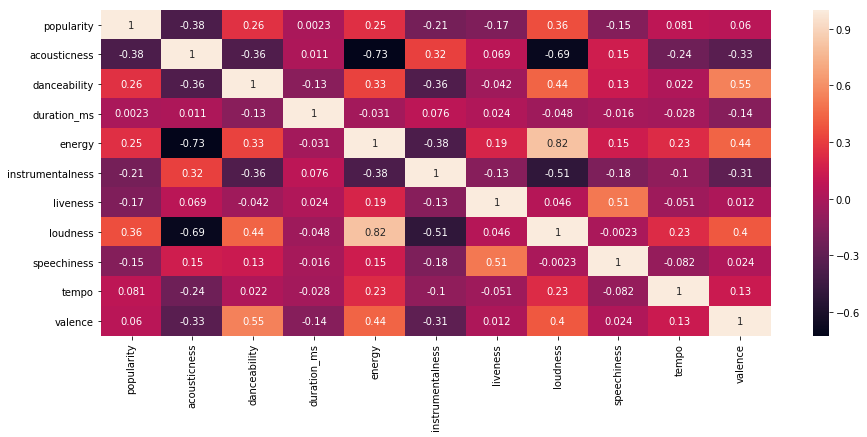

In [10]:
plt.figure(figsize=(15,6))
sns.heatmap(data.corr(), annot=True)

From the heatmap it can be assessed that the danceability, energy and loudness is said to have the highest amount of correlation with that of the valence (which is considered to be the target variable here).

Let us find out if there is any sort of outliers in the danceability, energy and loudness columns so that those can be taken into consideration for the model building purposes in a correct way.

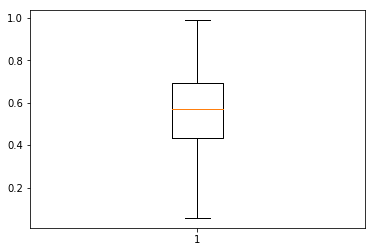

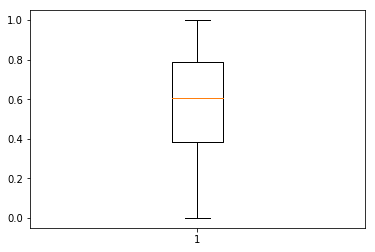

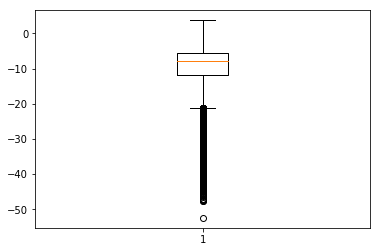

In [11]:
box_df = data[['danceability','energy','loudness']]
for i in box_df:
    plt.boxplot(box_df[i])
    plt.show()

Therefore it can be seen that the column 'loudness' has a lot of outliers in it. Hence the outliers should be removed or just should be handled in a right way.

In [12]:
data['loudness'].describe()

count    232725.000000
mean         -9.569885
std           5.998204
min         -52.457000
25%         -11.771000
50%          -7.762000
75%          -5.501000
max           3.744000
Name: loudness, dtype: float64

In [13]:
IQR = -5.501 + 11.771
IQR

6.2700000000000005

In [14]:
UL = -5.501 + 1.5*IQR
LL = -11.771 - 1.5*IQR
print(UL,LL)

3.904000000000001 -21.176000000000002


We replace those outliers with that of the median value of that column, this is because the existing median value of the column is under the IQR.

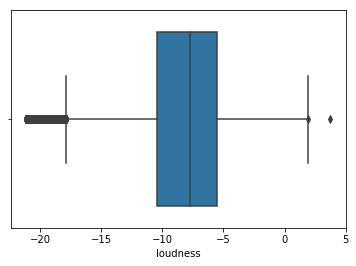

In [15]:
data['loudness'] = np.where(data['loudness']>= UL , data['loudness'].median() , data['loudness'])
data['loudness'] = np.where(data['loudness']<= LL , data['loudness'].median() , data['loudness'])
sns.boxplot(data['loudness'])

In [16]:
data[['loudness','danceability','energy']].isnull().sum()

loudness        0
danceability    0
energy          0
dtype: int64

Even after replacing the outliers value with that of the median value of the column, the outliers are still there. But comparatively less. Therefore we can consider this for our further analysis.

# MODEL BUILDING ON THE DATA

In [17]:
y = data[['valence']]
x = data[['loudness','danceability','energy']]

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(x ,y, train_size = 0.7, random_state = 100)

In [19]:
x_train.shape , x_test.shape, y_train.shape , y_test.shape

((162907, 3), (69818, 3), (162907, 1), (69818, 1))

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
mod = LinearRegression()

In [22]:
mod.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
mod.intercept_ , mod.coef_

(array([-0.11926986]), array([[-0.00410428,  0.63845442,  0.32529404]]))

In [24]:
from sklearn.metrics import r2_score

In [25]:
y_train_pred = mod.predict(x_train)

In [26]:
r2_score(y_train, y_train_pred)

0.3761178849747875

In [27]:
y_test_pred = mod.predict(x_test)

In [28]:
r2_score(y_test, y_test_pred)

0.3777485836348162

After taking all the combinations possible out of the selected three variables, I come to the conclusion that the all the 3 variables are equally important in deciding the value of the valence and hence these are the most effective parameters of deciding whether a song would have a higher/lower valence or not.